In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
DAILY_POTIONS_PER_APPRENTICE = 1
BASE_PRICE = 1000
EMPOWER_BONUS = 100
HASTE_BONUS = 0.18
LUCK_MULTIPLIER = 2
LUCK_CHANCE = 0.12
WEEKEND_OVERTIME_COST = 7000
MILESTONE_BOOST = 0.07
DAYS_IN_WEEK = 7
WORKDAYS_IN_WEEK = 5

# Simulation parameters
num_apprentices = 3
target_revenue = 1_000_000  # Target revenue in USD

# Function to calculate daily production
def daily_production(apprentice, empower=False, haste=False, luck=False):
    speed = apprentice["speed"]
    price = BASE_PRICE + (EMPOWER_BONUS if empower else 0)

    # Apply haste bonus
    if haste:
        speed *= (1 + HASTE_BONUS)

    # Determine daily potions produced
    potions = speed
    if luck and random.random() < LUCK_CHANCE:  # 12% chance to double the output
        potions *= LUCK_MULTIPLIER  # Double the output if lucky

    revenue = potions * price
    return potions, revenue

# Simulation loop
apprentices = [{"speed": DAILY_POTIONS_PER_APPRENTICE, "milestones": 0, "total_potions": 0} for _ in range(num_apprentices)]
total_revenue = 0
total_days = 0
daily_revenues = []  # Store daily revenues for plotting

while total_revenue < target_revenue:
    total_days += 1
    day_of_week = (total_days - 1) % DAYS_IN_WEEK
    is_weekend = day_of_week >= WORKDAYS_IN_WEEK

    # Weekend handling
    if is_weekend:
        if total_revenue >= WEEKEND_OVERTIME_COST:
            total_revenue -= WEEKEND_OVERTIME_COST
        else:
            continue  # Skip weekend if not enough funds

    # Select 2 apprentices for spells
    selected_apprentices = random.sample(range(num_apprentices), 2)
    empower_apprentice = selected_apprentices[0]
    haste_apprentice = selected_apprentices[1]

    # Daily operations
    daily_revenue = 0
    for i, apprentice in enumerate(apprentices):
        empower = i == empower_apprentice
        haste = i == haste_apprentice

        # "Lady Luck" is applied with random chance
        luck = random.random() < LUCK_CHANCE  # 12% chance to trigger Lady Luck

        potions, revenue = daily_production(apprentice, empower, haste, luck)
        apprentice["total_potions"] += potions
        apprentice["milestones"] += potions

        # Check milestone and boost speed
        if apprentice["milestones"] // 10 > (apprentice["milestones"] - potions) // 10:
            apprentice["speed"] *= (1 + MILESTONE_BOOST)

        daily_revenue += revenue

    total_revenue += daily_revenue
    daily_revenues.append(daily_revenue)  # Store the daily revenue

# Results
print(f"Target of $1,000,000 reached in {total_days} days.")
print("Apprentice performance:")
for i, apprentice in enumerate(apprentices):
    print(f"  Apprentice {i + 1}: Total Potions = {apprentice['total_potions']:.2f}, Final Speed = {apprentice['speed']:.2f} potions/day")


Target of $1,000,000 reached in 135 days.
Apprentice performance:
  Apprentice 1: Total Potions = 389.86, Final Speed = 13.08 potions/day
  Apprentice 2: Total Potions = 407.91, Final Speed = 13.99 potions/day
  Apprentice 3: Total Potions = 444.35, Final Speed = 16.02 potions/day


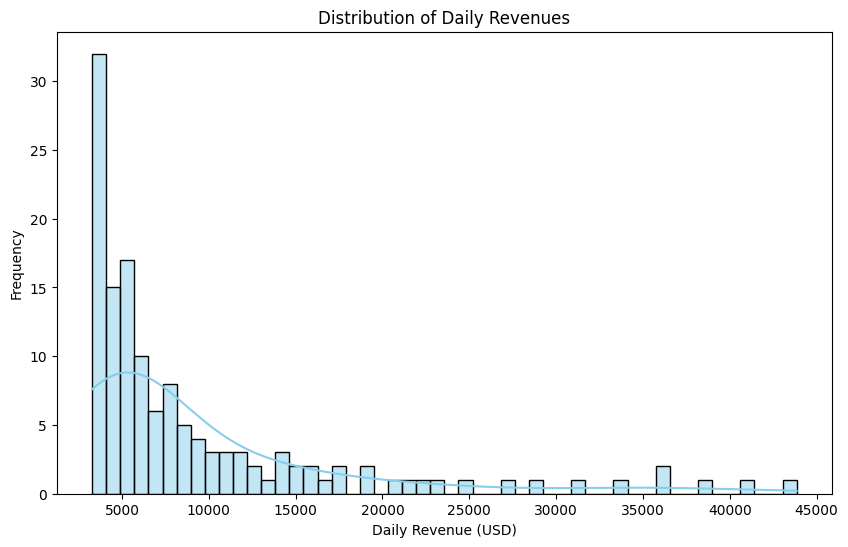

In [2]:
# Plotting the revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(daily_revenues, kde=True, color="skyblue", bins=50)
plt.title('Distribution of Daily Revenues')
plt.xlabel('Daily Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

In [3]:
DAILY_POTIONS_PER_WIZARD = 2  # Wizard's base production

# New function to simulate daily work with Wizard's participation
def simulate_with_wizard(target_revenue=1_000_000):
    # Simulation parameters for apprentices and wizard
    num_apprentices = 3
    apprentices = [{"speed": DAILY_POTIONS_PER_APPRENTICE, "milestones": 0, "total_potions": 0} for _ in range(num_apprentices)]
    wizard = {"speed": DAILY_POTIONS_PER_WIZARD, "total_potions": 0}  # Wizard's state
    total_revenue = 0
    total_days = 0

    while total_revenue < target_revenue:
        total_days += 1
        day_of_week = (total_days - 1) % DAYS_IN_WEEK
        is_weekend = day_of_week >= WORKDAYS_IN_WEEK

        # Weekend handling
        if is_weekend:
            if total_revenue >= WEEKEND_OVERTIME_COST:
                total_revenue -= WEEKEND_OVERTIME_COST
            else:
                continue  # Skip weekend if not enough funds

        # Select 2 apprentices for spells (Wizard doesn't get spells)
        selected_apprentices = random.sample(range(num_apprentices), 2)
        empower_apprentice = selected_apprentices[0]
        haste_apprentice = selected_apprentices[1]

        # Daily operations
        daily_revenue = 0

        # Wizard's daily production
        wizard_potions = wizard["speed"]  # Wizard's speed determines production (2 potions per day)
        wizard_revenue = wizard_potions * BASE_PRICE
        wizard["total_potions"] += wizard_potions
        daily_revenue += wizard_revenue

        # Process apprentices' daily production
        for i, apprentice in enumerate(apprentices):
            empower = i == empower_apprentice
            haste = i == haste_apprentice

            # "Lady Luck" is applied with random chance
            luck = random.random() < LUCK_CHANCE  # 12% chance to trigger Lady Luck

            potions, revenue = daily_production(apprentice, empower, haste, luck)
            apprentice["total_potions"] += potions
            apprentice["milestones"] += potions

            # Check milestone and boost speed
            if apprentice["milestones"] // 10 > (apprentice["milestones"] - potions) // 10:
                apprentice["speed"] *= (1 + MILESTONE_BOOST)

            daily_revenue += revenue

        total_revenue += daily_revenue

    # Final summary
    print(f"Target of $1,000,000 reached in {total_days} days.")
    print("Apprentice and Wizard performance:")
    for i, apprentice in enumerate(apprentices):
        print(f"  Apprentice {i + 1}: Total Potions = {apprentice['total_potions']:.2f}, Final Speed = {apprentice['speed']:.2f} potions/day")
    print(f"  Wizard: Total Potions = {wizard['total_potions']:.2f}")

# Call the new function for simulation with Wizard
simulate_with_wizard()

Target of $1,000,000 reached in 128 days.
Apprentice and Wizard performance:
  Apprentice 1: Total Potions = 314.28, Final Speed = 8.15 potions/day
  Apprentice 2: Total Potions = 351.13, Final Speed = 10.68 potions/day
  Apprentice 3: Total Potions = 305.75, Final Speed = 7.61 potions/day
  Wizard: Total Potions = 256.00


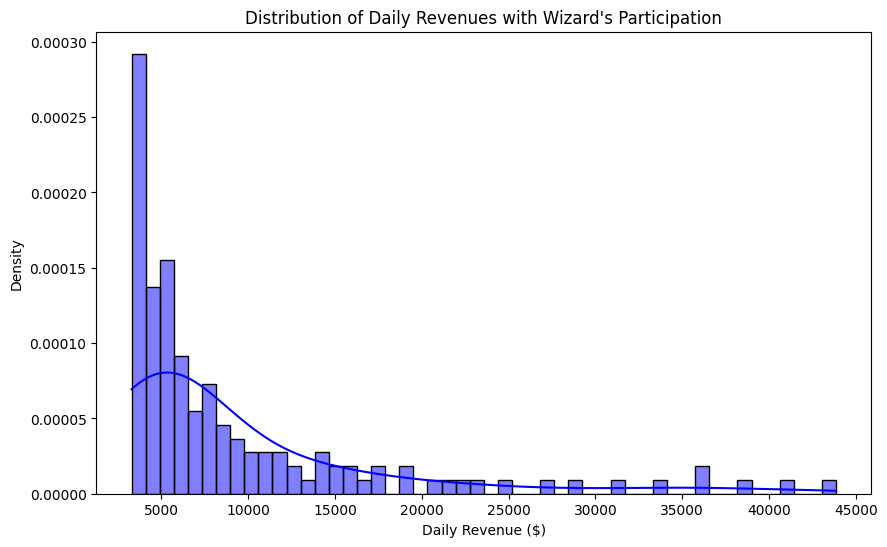

In [4]:
# Plotting the distribution of daily revenues
plt.figure(figsize=(10, 6))
sns.histplot(daily_revenues, kde=True, bins=50, color='blue', stat='density')
plt.title("Distribution of Daily Revenues with Wizard's Participation")
plt.xlabel("Daily Revenue ($)")
plt.ylabel("Density")
plt.show()